## Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.isna().sum()

#Passengers    0
dtype: int64

In [5]:
## Change the name of columns
df.columns = ['npass']

In [6]:
df.head()

,npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Visualize the time series data

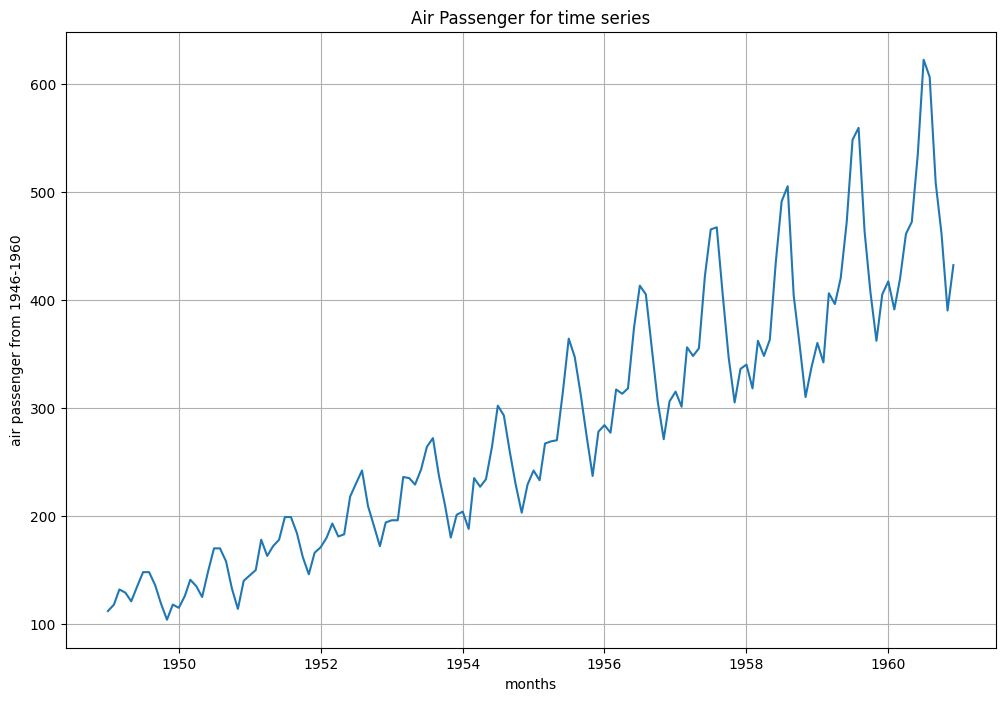

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df['npass'])
plt.xlabel('months')
plt.ylabel('air passenger from 1946-1960')
plt.title('Air Passenger for time series')
plt.grid()
plt.show()           

## Time series decompisition

#

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
Q = seasonal_decompose(df['npass'], model='multiplicative')

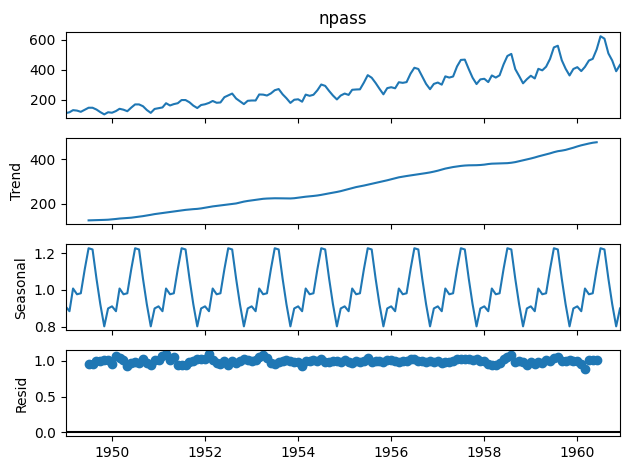

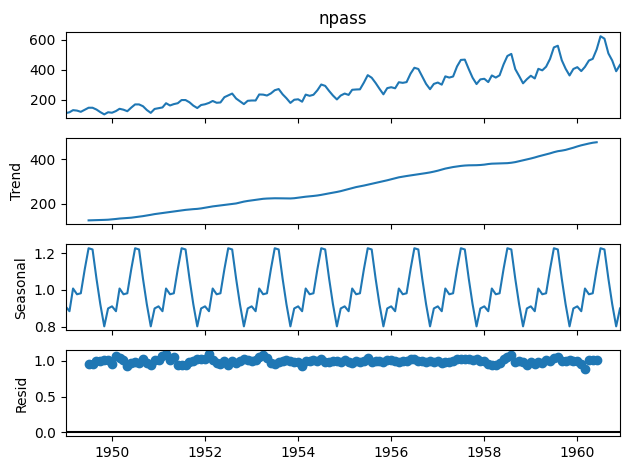

In [10]:
Q.plot()

## plot the trend line

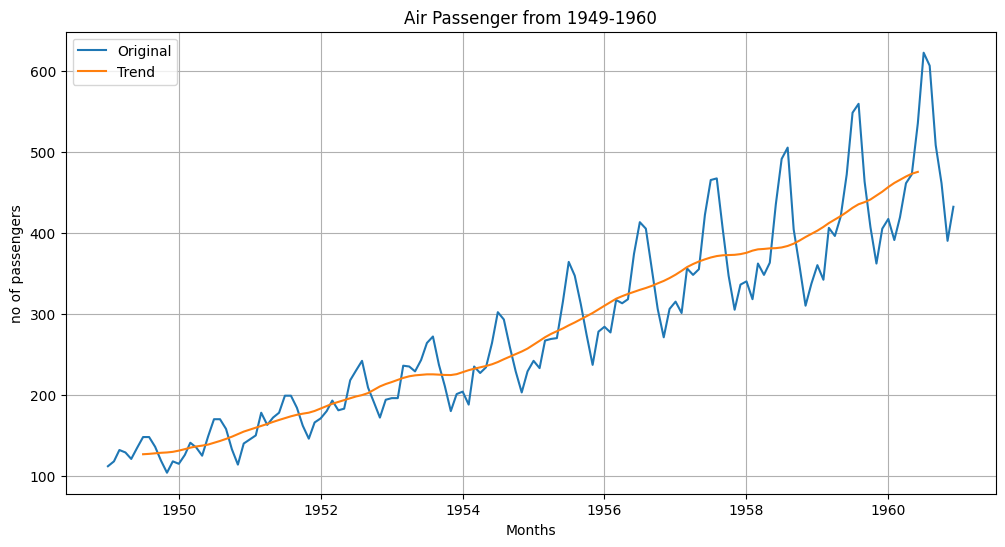

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['npass'], label='Original')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('no of passengers')
plt.title('Air Passenger from 1949-1960')
plt.legend()
plt.grid()
plt.show()

## plot the seasonality

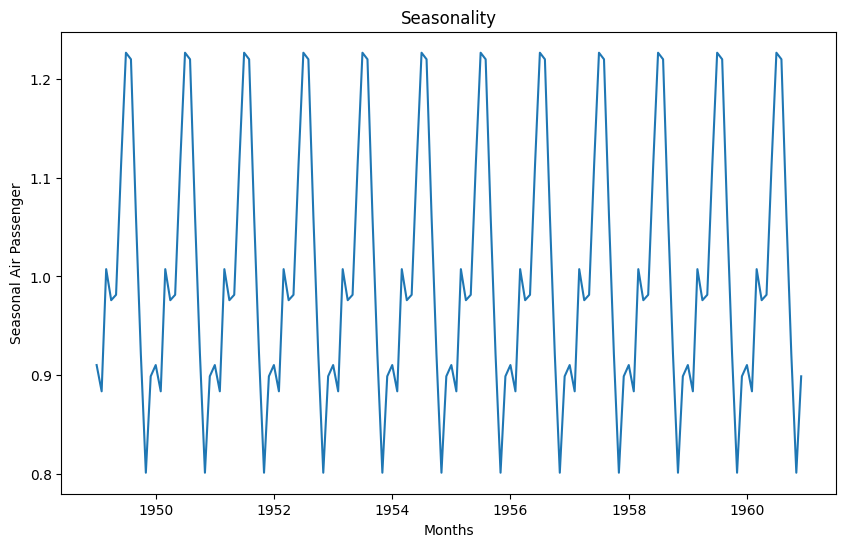

In [12]:
plt.figure(figsize=(10,6))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Seasonal Air Passenger')
plt.title('Seasonality')
plt.show()

## Plot the randomness or residuals

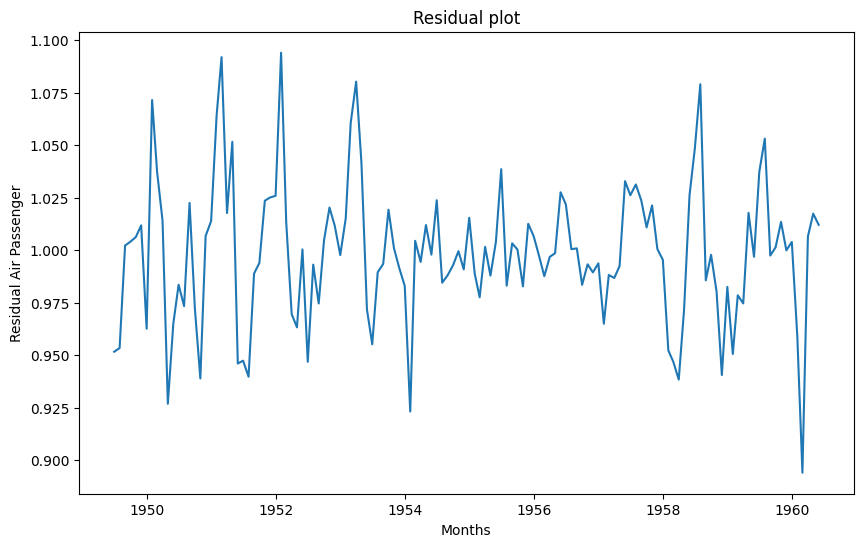

In [13]:
plt.figure(figsize=(10,6))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Residual Air Passenger')
plt.title('Residual plot')
plt.show()

## Multiplpicative model(Yt) = Trend * Seasonal * Random(Residual)

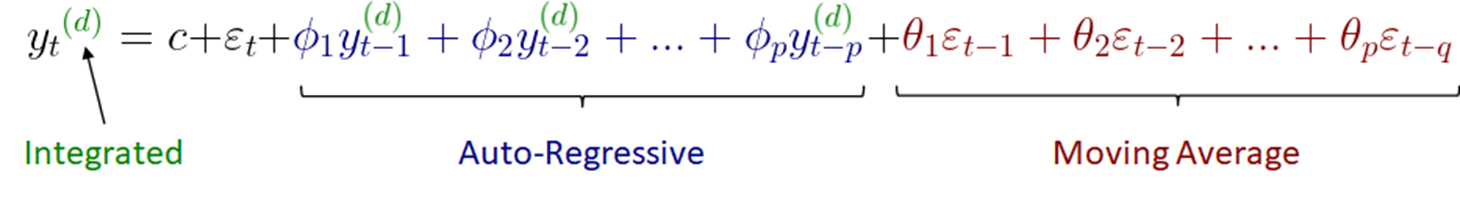

## ARIMA
Auto Regression Integrated Moving Average

## Install pmdarima model

In [14]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


from pmdarima.arima import auto_arima

In [16]:
model = auto_arima(df['npass'], seasonal=True, m=12)

In [17]:
model.order

(2, 1, 1)

In [18]:
p = model.order[0]
d = model.order[1]
q = model.order[2]

In [19]:
p

2

In [20]:
d

1

In [21]:
q

1

## Get the forecasted value for next 3 years(36 months)

In [24]:
forecast, conf = model.predict(n_periods=36, return_conf_int=True)

In [25]:
forecast

1961-01-01    445.634991
1961-02-01    420.395103
1961-03-01    449.198451
1961-04-01    491.840095
1961-05-01    503.394633
1961-06-01    566.862610
1961-07-01    654.260334
1961-08-01    638.597642
1961-09-01    540.883890
1961-10-01    494.126763
1961-11-01    423.332843
1961-12-01    465.507703
1962-01-01    479.291063
1962-02-01    454.177067
1962-03-01    483.087234
1962-04-01    525.819514
1962-05-01    537.450958
1962-06-01    600.984190
1962-07-01    688.437283
1962-08-01    672.821572
1962-09-01    575.147683
1962-10-01    528.424380
1962-11-01    457.659160
1962-12-01    499.858372
1963-01-01    513.662395
1963-02-01    488.565931
1963-03-01    517.490975
1963-04-01    560.235877
1963-05-01    571.878032
1963-06-01    635.420351
1963-07-01    722.881156
1963-08-01    707.271987
1963-09-01    609.603650
1963-10-01    562.885057
1963-11-01    492.123834
1963-12-01    534.326437
Freq: MS, dtype: float64

In [26]:
conf

array([[423.34487759, 467.92510471],
       [394.23551428, 446.55469252],
       [419.83188992, 478.56501199],
       [460.37649263, 523.3036964 ],
       [470.38073086, 536.40853522],
       [532.6996341 , 601.02558583],
       [619.22147403, 689.2991947 ],
       [602.88020044, 674.31508414],
       [504.63159492, 577.13618588],
       [457.44624137, 530.80728383],
       [386.30414338, 460.361543  ],
       [428.19161369, 502.82379164],
       [433.49782381, 525.08430198],
       [405.10923684, 503.2448968 ],
       [431.15603588, 535.01843199],
       [471.84098531, 579.79804326],
       [481.87404375, 593.02787316],
       [544.15707729, 657.81130293],
       [630.60926527, 746.26530151],
       [614.17967749, 731.46346653],
       [515.83290928, 634.46245755],
       [468.5446067 , 588.30415285],
       [397.29775817, 518.02056239],
       [439.08041924, 560.63632426],
       [446.32772851, 580.99706096],
       [418.31885906, 558.81300308],
       [444.62493726, 590.35701177],
 

## Convert above result into dataframe

In [28]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['forecast']
df_forecast

,forecast
1961-01-01,445.634991
1961-02-01,420.395103
1961-03-01,449.198451
1961-04-01,491.840095
1961-05-01,503.394633
1961-06-01,566.862610
1961-07-01,654.260334
1961-08-01,638.597642
1961-09-01,540.883890
1961-10-01,494.126763


In [29]:
df_forecast[['low_conf', 'upper_conf']] = conf

In [31]:
df_forecast

,forecast,low_conf,upper_conf
1961-01-01,445.634991,423.344878,467.925105
1961-02-01,420.395103,394.235514,446.554693
1961-03-01,449.198451,419.831890,478.565012
1961-04-01,491.840095,460.376493,523.303696
1961-05-01,503.394633,470.380731,536.408535
1961-06-01,566.862610,532.699634,601.025586
1961-07-01,654.260334,619.221474,689.299195
1961-08-01,638.597642,602.880200,674.315084
1961-09-01,540.883890,504.631595,577.136186
1961-10-01,494.126763,457.446241,530.807284


In [32]:
df_forecast['forecast'] = df_forecast['forecast'].apply(round)

In [33]:
df_forecast

,forecast,low_conf,upper_conf
1961-01-01,446,423.344878,467.925105
1961-02-01,420,394.235514,446.554693
1961-03-01,449,419.831890,478.565012
1961-04-01,492,460.376493,523.303696
1961-05-01,503,470.380731,536.408535
1961-06-01,567,532.699634,601.025586
1961-07-01,654,619.221474,689.299195
1961-08-01,639,602.880200,674.315084
1961-09-01,541,504.631595,577.136186
1961-10-01,494,457.446241,530.807284


In [39]:
for i in df_forecast:
    df_forecast[i] = df_forecast[i].apply(round)

In [40]:
df_forecast

,forecast,low_conf,upper_conf
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


## Save above result into CSV file

In [42]:
df_forecast.to_csv('AirPassenger_forecast')

## Visualize the above result

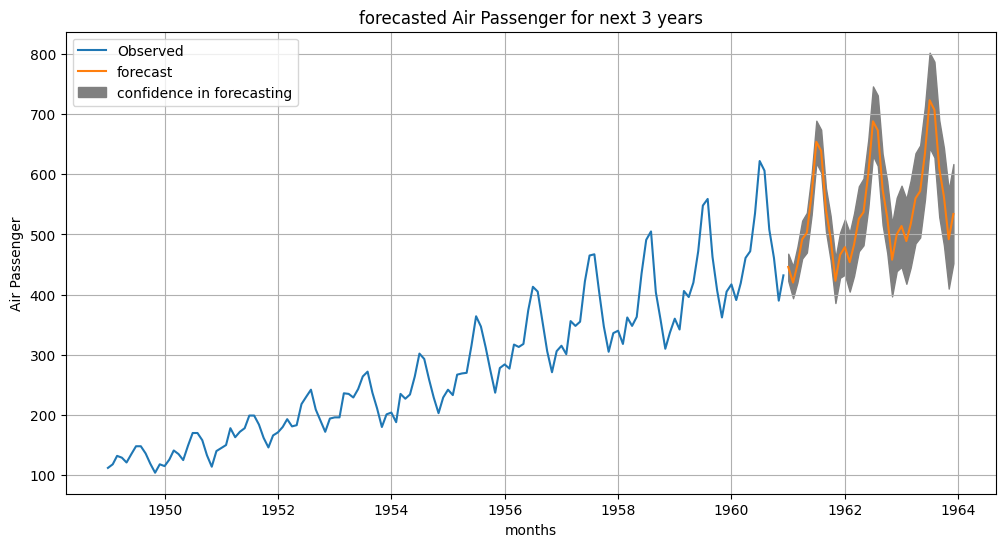

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df['npass'], label='Observed')
plt.plot(df_forecast['forecast'], label ='forecast')
plt.fill_between(df_forecast.index, df_forecast['low_conf'], df_forecast['upper_conf'], color='gray', label='confidence in forecasting')
plt.xlabel('months')
plt.ylabel('Air Passenger')
plt.title('forecasted Air Passenger for next 3 years')
plt.legend()
plt.grid()
plt.show()